# CNN - Deep Learning

## Abstract
<p style='text-align:justify' >
The goal of this project is to create a Deep Learning model using Convolutional Neural Networks. The dataset consists of images of 5 types of ships which are labeled {'Cargo': 1, 'Military': 2, 'Carrier': 3, 'Cruise': 4, 'Tankers': 5}. The Convolutional Neural Network (CNN) is trained with the images of all these types of ships using a 60% of the data and validated simulataneously against 20% of the data and finally test the trained model with the remaining 20% of the data. The model is adjusted with various hyperparameters like using different activation functions, loss functions, changing the epochs, using different neural network initializing methods, changing network size and number of layers and finally obtaining the best accurate version of the CNN for the data. The programming is done in TensorFlow API by Google and the 'loss and accuracy' plot indicates how good or bad the network is trained aganist the data.

### Problem Statement
<p style='text-align:justify' >
     Develop a Deep Learning model that automatically classifies the type of the ship when one or more images are given as input. The data can be obtained from this <a href="https://www.kaggle.com/arpitjain007/game-of-deep-learning-ship-datasets">link</a>


   
### Data Introduction
<p style='text-align:justify' >
       The ships dataset from kaggle has around 6252 images which are randomly split into train and test sets for the neural network. The categories of ships and their corresponding codes in the dataset are as follows - {'Cargo': 1, 'Military': 2, 'Carrier': 3, 'Cruise': 4, 'Tankers': 5}

     
       
### Solution approach
<p style='text-align:justify' >
    1. Firstly, the csv file which has the image name and category of the image is converted to a pandas dataframe and then split into training and testing dataframes.<br><br> 
    2. Secondly, the images using the names and labels in the dataframes are converted to an tuple format which specifies images as numpy n-dimensional arrays of shape (32,32) and the labels in the second part of the tuple.<br><br>
    3. Thirdly, the image pixels data that is generated is fed to the neural network made of Conv2D layers, MaxPooling2D, Flatten and Dense layers with appropriate activation functions added to each layer and other methods.<br><br>
    4. Finally the results are evaluated with respect to training, validation losses and accuracies to understand the behavior of the Neural Network, and choose the best conbination of the parameters as the final model.


    
### Dependencies
    
   1. TensorFlow - Refer this <a href="https://www.tensorflow.org/install/pip#system-install">link</a> for installation instructions.
   2. Scikit-learn - Installation instructions <a href="https://scikit-learn.org/stable/install.html">here</a>
   3. NumPy - Installation instructions <a href="https://numpy.org/install/">here</a>
   4. Pandas - Installation instructions <a href="https://pandas.pydata.org/getting_started.html">here</a>
   5. Matplotlib - Installation instructions <a href="https://matplotlib.org/stable/users/installing.html">here</a>

# Part A - Deep Learning model - Convolutional Neural Network (CNN)

## Let's import libraries

In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
from tensorflow.keras.layers import LeakyReLU
from tensorflow.keras.losses import *
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from IPython.display import display, Image

## Loading the Data

##### It is assumed that data folder is in the same directory as this file. Hence relative path is being in the parameters. 

In [2]:
df = pd.read_csv('train.csv', dtype=str)

In [3]:
# Viewing the contents of the dataframe

df.head()

,image,category
0,2823080.jpg,1
1,2870024.jpg,1
2,2662125.jpg,2
3,2900420.jpg,3
4,2804883.jpg,2


## Splitting the data into training and testing dataset.

In [4]:
train_data, test_data = train_test_split(df, test_size=0.2, random_state=42)

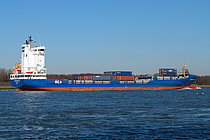

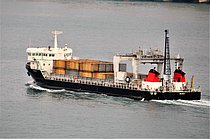

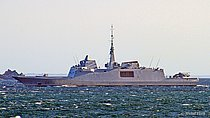

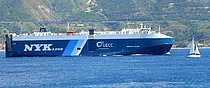

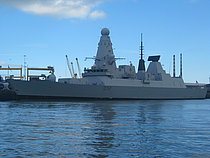

In [5]:
# Sample images of ships are shown below
for i in range(5):
    display(Image(width=470,filename='./images/'+train_data.image[i]))

In [6]:
print("===== Images used in the training data =====", '\n')

display(train_data)

print("===== Images used in the testing data =====", '\n')

display(test_data)

===== Images used in the training data ===== 



,image,category
478,2790315.jpg,1
5099,2895143.jpg,3
1203,2677725.jpg,2
5674,2779530.jpg,2
142,2810767.jpg,1
...,...,...
3772,2853892.jpg,1
5191,2903689.jpg,2
5226,1820874.jpg,4
5390,2884285.jpg,5


===== Images used in the testing data ===== 



,image,category
1703,2525185.jpg,4
5448,2837639.jpg,1
5058,2904577.jpg,1
1149,2866290.jpg,3
432,2459131.jpg,4
...,...,...
416,2884436.jpg,5
6110,2782276.jpg,1
3185,2843694.jpg,1
2025,2792377.jpg,1


## Data Preprocessing
Images are to be converted into (32,32) dimensional arrays using ImageDataGenerator() from TensorFlow

In [7]:
data_generator = ImageDataGenerator(rescale=1./255, validation_split=0.2)

### The images data is then split into training, validation and testing sets

What happens here is, the names of the images are in the dataframe and we give the dataframe as the arguemnt to the data_generator.flow_from_dataframe() method that is used for making various adjustments and it is also useful to load the images directly using a single command. So, we convert all the images into 32*32 pixels and define batch size as 64 that is how many images are to be imported and changed simultaneously.

In [8]:
# If this returns an error, it should be either path is wrong or the parameters that are entered are not valid ones.

path_train = './images'

train_df = data_generator.flow_from_dataframe(dataframe=train_data,
                                              directory=path_train,
                                                    x_col='image',
                                                    y_col='category',
                                                    target_size=(32,32),
                                                    class_mode='sparse',
                                                    subset='training',
                                                    batch_size=64,
                                                    seed =1
                                                    )
val_df = data_generator.flow_from_dataframe(dataframe=train_data,
                                            directory=path_train,
                                            x_col='image',
                                                    y_col='category',
                                                    target_size=(32,32),
                                                    class_mode='sparse',
                                                    batch_size=64,
                                                    subset='validation',
                                                    seed =1
                                                    )
test_df = data_generator.flow_from_dataframe(dataframe=test_data,
                                            directory=path_train,
                                            x_col='image',
                                                    y_col='category',
                                                    target_size=(32,32),
                                                    class_mode='sparse',
                                                    batch_size=64,
                                                    seed =1)

Found 4001 validated image filenames belonging to 5 classes.
Found 1000 validated image filenames belonging to 5 classes.
Found 1251 validated image filenames belonging to 5 classes.


In [9]:
categories = ['Cargo','Military', 'Carrier', 'Cruise', 'Tankers']

### Defining four functions
1. Model a network
2. Training the model with the given parameters, 
3. Plotting the training process and 
4. Printing testing results

This part is important since we reuse these functions many times in the project for experimenting with different hyperparameters etc and the functions come in handy as we just need to replace only some parameters

In [10]:
def model_cnn(activation_func, optimizer, loss_func):
    """This function takes the activation function, optimizer and the loss function for the CNN, compiles it and returns the model"""
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation=activation_func, input_shape=(32, 32, 3)))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_func))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation=activation_func))
    model.add(layers.Flatten())
    model.add(layers.Dense(64, activation=activation_func))
    model.add(layers.Dense(10))
    model.compile(loss=loss_func, optimizer=optimizer, metrics=['accuracy'])
    return model
    

In [11]:
def train_model(model,epochs):
    """This function trains the given model with specified number of epochs. It returns the training results"""
    train_steps = train_df.n//train_df.batch_size
    val_steps = val_df.n//val_df.batch_size
    train_results = model.fit(train_df,
                              steps_per_epoch=train_steps, 
                              epochs=epochs, 
                              validation_data=val_df,
                              validation_steps=val_steps)
    return train_results

In [12]:
def plot_train_results(train_results):
    """This functin plots and displays the training results (Training Accuracy, Validation Accuracy) over the number of epochs"""
    acc = train_results.history['accuracy']
    val_acc = train_results.history['val_accuracy']

    loss = train_results.history['loss']
    val_loss = train_results.history['val_loss']
    print('\n')
    plt.figure(figsize=(12, 12))
    plt.subplot(2, 1, 1)
    plt.plot(acc, label='Training Accuracy')
    plt.plot(val_acc, label='Validation Accuracy')
    plt.legend(loc='best')
    plt.ylabel('Accuracy', fontsize=15)
    plt.ylim([min(plt.ylim()),1])
    plt.title('Training and Validation Accuracy', fontsize=20)

    plt.subplot(2, 1, 2)
    plt.plot(loss, label='Training Loss')
    plt.plot(val_loss, label='Validation Loss')
    plt.legend(loc='best')
    plt.ylabel('Loss', fontsize=15)
    plt.ylim([0,max(plt.ylim())])
    plt.title('Training and Validation Loss', fontsize=20)
    plt.xlabel('Epoch', fontsize=15)
    plt.show()

In [13]:
def test_results(model, testing_data):
    """This function return the testing accuracy and loss of the specified model"""
    test_loss, test_acc = model.evaluate(test_df, verbose=2)
    print('=====================')
    print('Test loss: {:.2f}'.format(test_loss))
    print('Test accuracy: {:.2f}%'.format(test_acc*100))
    print('=====================')
    return

## The CNN Model 1:
Parameters: 
   * Activation function = ReLU.
   * Loss function = SparseCategoricalCrossentropy()
   * Optimizer = ADAM
   
More information about ReLU can be found <a href="https://machinelearningmastery.com/rectified-linear-activation-function-for-deep-learning-neural-networks/#:~:text=The%20rectified%20linear%20activation%20function%20or%20ReLU%20for,easier%20to%20train%20and%20often%20achieves%20better%20performance.">here</a>. About Sparse Categorical Cross Entropy, it is <a href="https://leakyrelu.com/2020/01/01/difference-between-categorical-and-sparse-categorical-cross-entropy-loss-function/">here</a> and 'ADAM' optimizer it is <a href="https://machinelearningmastery.com/adam-optimization-algorithm-for-deep-learning/#:~:text=Adam%20is%20an%20optimization%20algorithm%20that%20can%20be,name%20Adam%20is%20derived%20from%20adaptive%20moment%20estimation.">here</a>

The convolution neural network is formed by 3 conv2d layers, 2 MaxPooling and 1 Flatten and 1 Dense layers.

In [14]:
model_1 = model_cnn('relu','adam',SparseCategoricalCrossentropy(from_logits=True))
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

### The model is trained for 15 epochs and the maximum validation accuracy achieved is 69.17%

In [15]:
epochs = 15
train_results = train_model(model_1,epochs)

Epoch 1/15
62/62 [==============================] - 7s 101ms/step - loss: 1.7405 - accuracy: 0.2884 - val_loss: 1.4835 - val_accuracy: 0.3948
Epoch 2/15
62/62 [==============================] - 5s 87ms/step - loss: 1.4448 - accuracy: 0.3828 - val_loss: 1.2789 - val_accuracy: 0.4927
Epoch 3/15
62/62 [==============================] - 6s 90ms/step - loss: 1.2544 - accuracy: 0.4839 - val_loss: 1.1777 - val_accuracy: 0.5552
Epoch 4/15
62/62 [==============================] - 5s 86ms/step - loss: 1.1524 - accuracy: 0.5450 - val_loss: 1.1879 - val_accuracy: 0.5063
Epoch 5/15
62/62 [==============================] - 5s 85ms/step - loss: 1.0981 - accuracy: 0.5534 - val_loss: 1.1587 - val_accuracy: 0.5104
Epoch 6/15
62/62 [==============================] - 5s 83ms/step - loss: 1.0664 - accuracy: 0.5548 - val_loss: 1.0386 - val_accuracy: 0.5833
Epoch 7/15
62/62 [==============================] - 5s 83ms/step - loss: 0.9567 - accuracy: 0.6137 - val_loss: 1.0117 - val_accuracy: 0.5969
Epoch 8/15
6

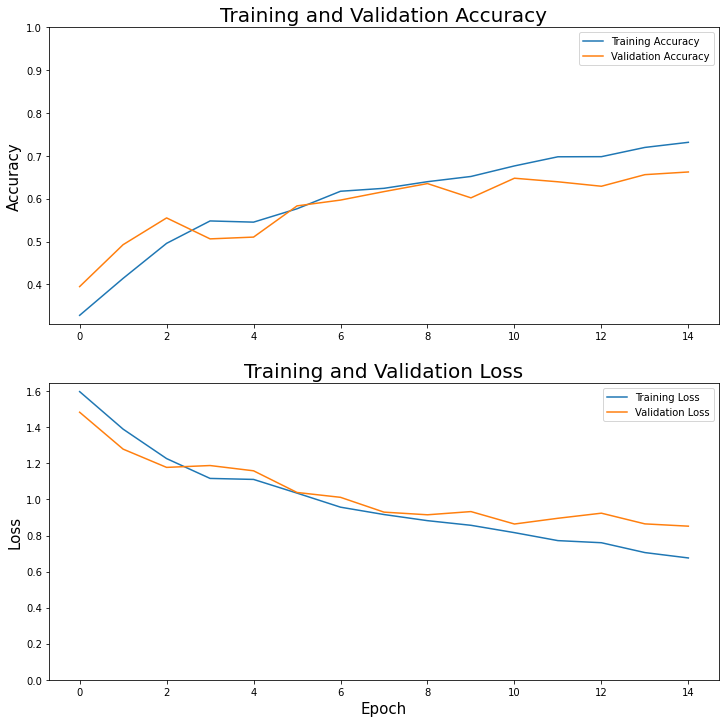

In [16]:
plot_train_results(train_results)

### The testing accuracy is near to validation accuracy and it is 68.43%

In [17]:
#Testing results:
test_results(model_1, test_df)

20/20 - 1s - loss: 0.9300 - accuracy: 0.6259
Test loss: 0.93
Test accuracy: 62.59%


# Part B: Changing the activation function
Parameters: 
   * Activation function = TanH.
   * Loss function = SparseCategoricalCrossentropy()
   * Optimizer = ADAM

In [18]:
model_2 = model_cnn('tanh','adam',SparseCategoricalCrossentropy(from_logits=True))
model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_1 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 64)               

In [19]:
epochs = 15
train_results = train_model(model_2,epochs)

Epoch 1/15
62/62 [==============================] - 6s 88ms/step - loss: 1.6190 - accuracy: 0.3157 - val_loss: 1.3705 - val_accuracy: 0.4417
Epoch 2/15
62/62 [==============================] - 5s 81ms/step - loss: 1.2825 - accuracy: 0.4700 - val_loss: 1.2340 - val_accuracy: 0.5135
Epoch 3/15
62/62 [==============================] - 5s 81ms/step - loss: 1.1535 - accuracy: 0.5404 - val_loss: 1.1345 - val_accuracy: 0.5490
Epoch 4/15
62/62 [==============================] - 5s 77ms/step - loss: 1.0118 - accuracy: 0.5965 - val_loss: 1.0057 - val_accuracy: 0.6135
Epoch 5/15
62/62 [==============================] - 5s 78ms/step - loss: 0.9135 - accuracy: 0.6439 - val_loss: 0.9652 - val_accuracy: 0.6229
Epoch 6/15
62/62 [==============================] - 5s 81ms/step - loss: 0.8580 - accuracy: 0.6603 - val_loss: 0.8991 - val_accuracy: 0.6375
Epoch 7/15
62/62 [==============================] - 6s 93ms/step - loss: 0.8011 - accuracy: 0.6837 - val_loss: 0.9029 - val_accuracy: 0.6458
Epoch 8/15
62

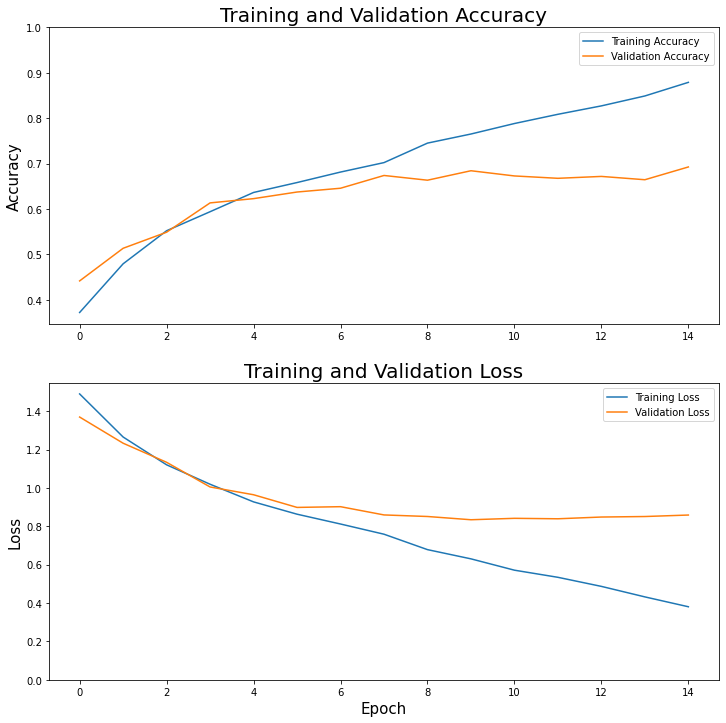

In [20]:
plot_train_results(train_results)

In [21]:
#Testing Results

test_results(model_2, test_df)

20/20 - 2s - loss: 0.9710 - accuracy: 0.6395
Test loss: 0.97
Test accuracy: 63.95%


The tanh activation function gave a similar accuracy than relu function with around 63.14% and the learning speed is similar to relu function.

## Another Activation function
Parameters: 
   * Activation function = softsign.
   * Loss function = SparseCategoricalCrossentropy()
   * Optimizer = ADAM

In [22]:
model_3 = model_cnn('softsign', 'adam',SparseCategoricalCrossentropy(from_logits=True))
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_2 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)               

In [23]:
epochs = 15
train_results = train_model(model_3,epochs)

Epoch 1/15
62/62 [==============================] - 7s 102ms/step - loss: 1.6785 - accuracy: 0.3293 - val_loss: 1.5235 - val_accuracy: 0.3458
Epoch 2/15
62/62 [==============================] - 6s 92ms/step - loss: 1.5123 - accuracy: 0.3600 - val_loss: 1.3355 - val_accuracy: 0.4625
Epoch 3/15
62/62 [==============================] - 5s 87ms/step - loss: 1.2976 - accuracy: 0.4683 - val_loss: 1.1985 - val_accuracy: 0.5156
Epoch 4/15
62/62 [==============================] - 5s 81ms/step - loss: 1.1699 - accuracy: 0.5310 - val_loss: 1.0910 - val_accuracy: 0.5760
Epoch 5/15
62/62 [==============================] - 5s 74ms/step - loss: 1.0522 - accuracy: 0.5699 - val_loss: 1.0644 - val_accuracy: 0.5823
Epoch 6/15
62/62 [==============================] - 5s 73ms/step - loss: 1.0090 - accuracy: 0.5891 - val_loss: 1.0147 - val_accuracy: 0.6052
Epoch 7/15
62/62 [==============================] - 5s 73ms/step - loss: 0.9222 - accuracy: 0.6321 - val_loss: 0.9392 - val_accuracy: 0.6198
Epoch 8/15
6

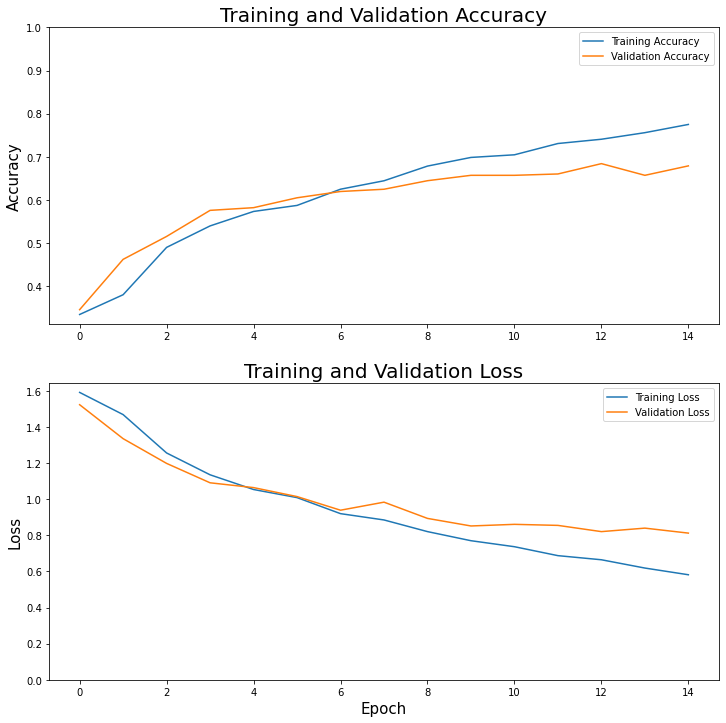

In [24]:
plot_train_results(train_results)

In [25]:
test_results(model_3, test_df)

20/20 - 2s - loss: 0.8889 - accuracy: 0.6395
Test loss: 0.89
Test accuracy: 63.95%


The softsign activation function gave very less accuracy than tanh function with around 24%  and the learning speed is similar to relu function.

# Part C: Changing Loss function
Parameters: 
   * Activation function = ReLU.
   * Loss function = categorical_hinge
   * Optimizer = ADAM

In [26]:
# model 4:
model_4 = model_cnn('relu', 'adam', 'categorical_hinge')
model_4.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_3 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)               

In [27]:
epochs = 15
train_results = train_model(model_4,epochs)

Epoch 1/15
62/62 [==============================] - 10s 156ms/step - loss: 0.4755 - accuracy: 0.0979 - val_loss: 0.3857 - val_accuracy: 0.0990
Epoch 2/15
62/62 [==============================] - 9s 140ms/step - loss: 0.3808 - accuracy: 0.1145 - val_loss: 0.3913 - val_accuracy: 0.1187
Epoch 3/15
62/62 [==============================] - 8s 124ms/step - loss: 0.3726 - accuracy: 0.1221 - val_loss: 0.3759 - val_accuracy: 0.0667
Epoch 4/15
62/62 [==============================] - 7s 109ms/step - loss: 0.3724 - accuracy: 0.0898 - val_loss: 0.3864 - val_accuracy: 0.0500
Epoch 5/15
62/62 [==============================] - 6s 97ms/step - loss: 0.3620 - accuracy: 0.0935 - val_loss: 0.3781 - val_accuracy: 0.0458
Epoch 6/15
62/62 [==============================] - 6s 92ms/step - loss: 0.3748 - accuracy: 0.0798 - val_loss: 0.3824 - val_accuracy: 0.0490
Epoch 7/15
62/62 [==============================] - 5s 87ms/step - loss: 0.3758 - accuracy: 0.0736 - val_loss: 0.3723 - val_accuracy: 0.1333
Epoch 8/

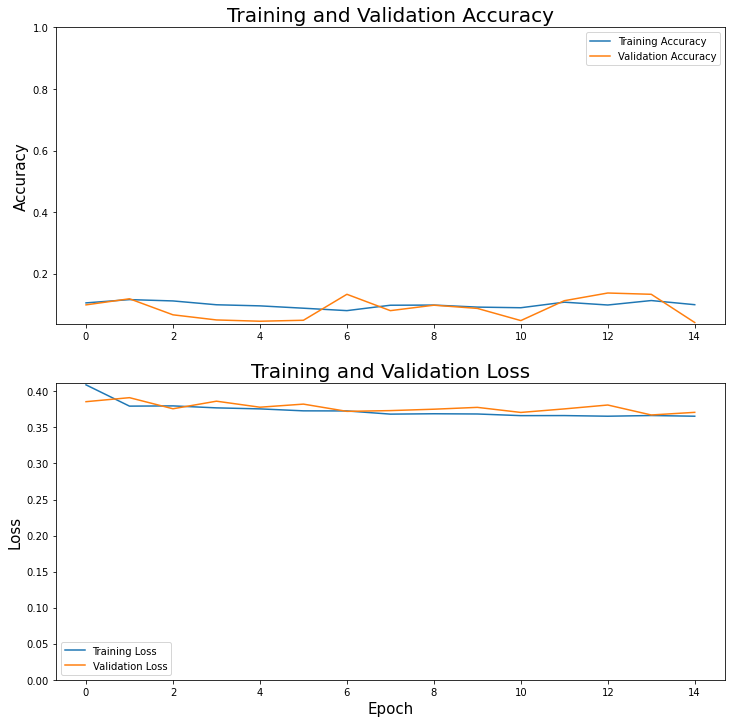

In [28]:
plot_train_results(train_results)

In [29]:
test_results(model_4, test_df)

20/20 - 1s - loss: 0.3625 - accuracy: 0.0584
Test loss: 0.36
Test accuracy: 5.84%


Parameters: 
   * Activation function = ReLU.
   * Loss function = mean_squared_error
   * Optimizer = ADAM

In [30]:
model_5 = model_cnn('relu','adam','mean_squared_error')

In [31]:
epochs = 15
train_results = train_model(model_5,epochs)

Epoch 1/15
62/62 [==============================] - 5s 82ms/step - loss: 3.0893 - accuracy: 0.0908 - val_loss: 2.4407 - val_accuracy: 0.0896
Epoch 2/15
62/62 [==============================] - 5s 80ms/step - loss: 2.3597 - accuracy: 0.0979 - val_loss: 2.3992 - val_accuracy: 0.1729
Epoch 3/15
62/62 [==============================] - 5s 81ms/step - loss: 2.2730 - accuracy: 0.1072 - val_loss: 2.2027 - val_accuracy: 0.1521
Epoch 4/15
62/62 [==============================] - 5s 80ms/step - loss: 2.1915 - accuracy: 0.1218 - val_loss: 2.1337 - val_accuracy: 0.2229
Epoch 5/15
62/62 [==============================] - 5s 78ms/step - loss: 2.1258 - accuracy: 0.1222 - val_loss: 2.2753 - val_accuracy: 0.1688
Epoch 6/15
62/62 [==============================] - 5s 78ms/step - loss: 2.0760 - accuracy: 0.1251 - val_loss: 2.0333 - val_accuracy: 0.1021
Epoch 7/15
62/62 [==============================] - 5s 77ms/step - loss: 1.9729 - accuracy: 0.1133 - val_loss: 1.9962 - val_accuracy: 0.1021
Epoch 8/15
62

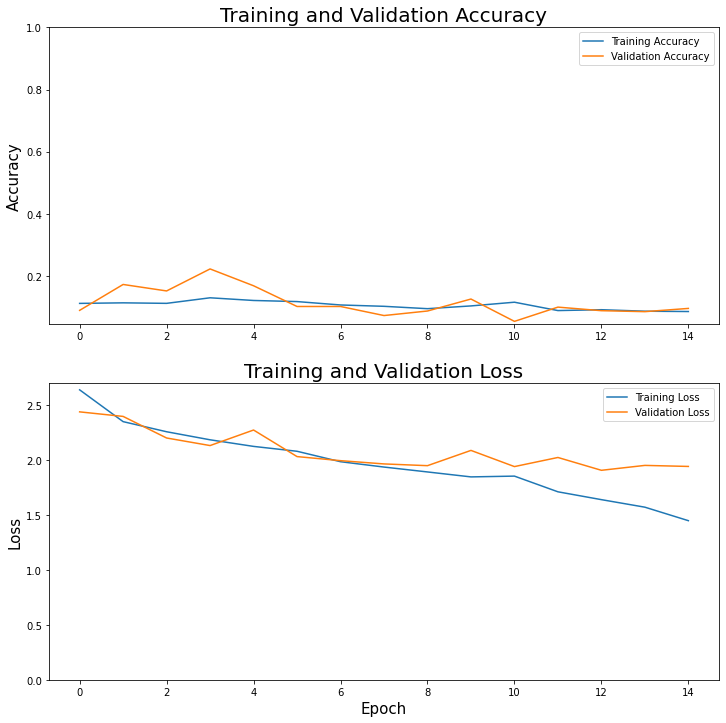

In [32]:
plot_train_results(train_results)

In [33]:
test_results(model_5, test_df)

20/20 - 1s - loss: 2.1826 - accuracy: 0.1143
Test loss: 2.18
Test accuracy: 11.43%


# Changing Epochs

In [34]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten (Flatten)            (None, 1024)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                6

In [35]:
epochs = 10
train_results = train_model(model_1,epochs)

Epoch 1/10
62/62 [==============================] - 5s 86ms/step - loss: 0.6592 - accuracy: 0.7358 - val_loss: 0.8438 - val_accuracy: 0.6698
Epoch 2/10
62/62 [==============================] - 5s 84ms/step - loss: 0.6359 - accuracy: 0.7536 - val_loss: 0.8549 - val_accuracy: 0.6573
Epoch 3/10
62/62 [==============================] - 5s 87ms/step - loss: 0.5907 - accuracy: 0.7750 - val_loss: 0.8946 - val_accuracy: 0.6438
Epoch 4/10
62/62 [==============================] - 5s 85ms/step - loss: 0.5770 - accuracy: 0.7790 - val_loss: 0.8956 - val_accuracy: 0.6354
Epoch 5/10
62/62 [==============================] - 5s 85ms/step - loss: 0.5366 - accuracy: 0.7945 - val_loss: 0.8635 - val_accuracy: 0.6792
Epoch 6/10
62/62 [==============================] - 5s 87ms/step - loss: 0.4973 - accuracy: 0.8153 - val_loss: 0.8714 - val_accuracy: 0.6677
Epoch 7/10
62/62 [==============================] - 5s 83ms/step - loss: 0.4930 - accuracy: 0.8153 - val_loss: 0.8512 - val_accuracy: 0.6802
Epoch 8/10
62

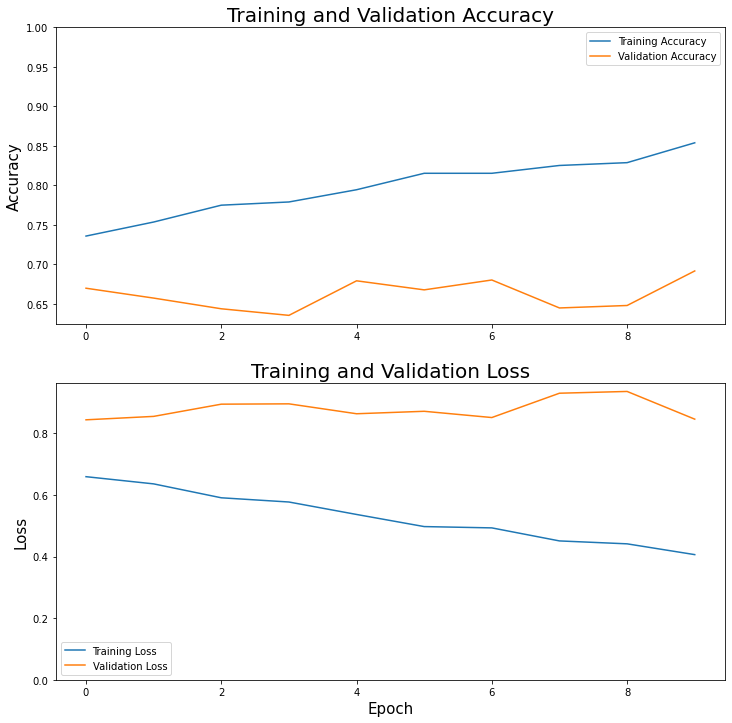

In [36]:
plot_train_results(train_results)

In [37]:
test_results(model_1, test_df)

20/20 - 1s - loss: 0.8958 - accuracy: 0.6579
Test loss: 0.90
Test accuracy: 65.79%


In [38]:
epochs = 5
train_results = train_model(model_1, epochs)

Epoch 1/5
62/62 [==============================] - 5s 82ms/step - loss: 0.3913 - accuracy: 0.8631 - val_loss: 0.8762 - val_accuracy: 0.6771
Epoch 2/5
62/62 [==============================] - 5s 82ms/step - loss: 0.3281 - accuracy: 0.8824 - val_loss: 0.9440 - val_accuracy: 0.6927
Epoch 3/5
62/62 [==============================] - 5s 81ms/step - loss: 0.3325 - accuracy: 0.8806 - val_loss: 0.9987 - val_accuracy: 0.6719
Epoch 4/5
62/62 [==============================] - 5s 82ms/step - loss: 0.2898 - accuracy: 0.9017 - val_loss: 0.9753 - val_accuracy: 0.6854
Epoch 5/5
62/62 [==============================] - 5s 83ms/step - loss: 0.2564 - accuracy: 0.9139 - val_loss: 0.9933 - val_accuracy: 0.6781


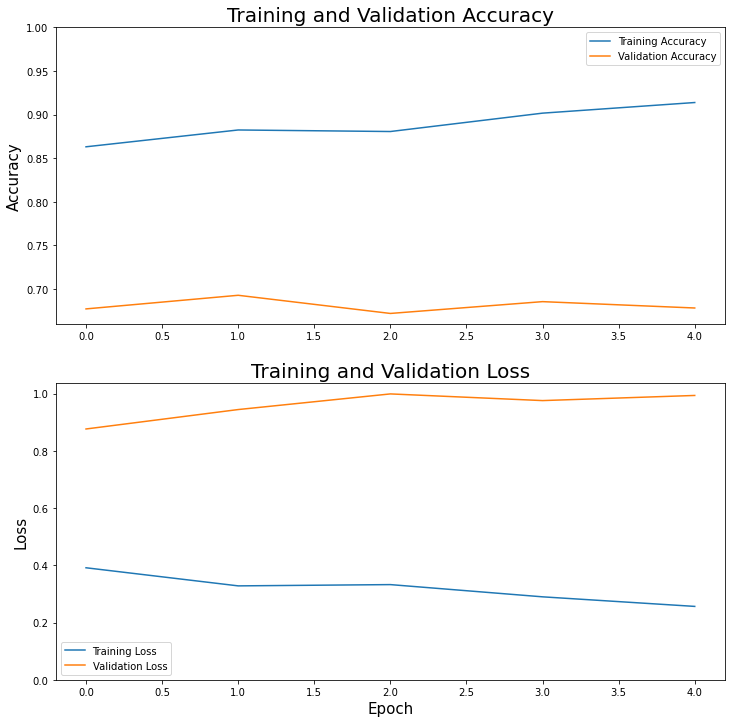

In [39]:
plot_train_results(train_results)

In [40]:
test_results(model_1, test_df)

20/20 - 1s - loss: 1.0752 - accuracy: 0.6619
Test loss: 1.08
Test accuracy: 66.19%


# Changing Gradient Estimation

In [41]:
model_6 = model_cnn(activation_func='relu', optimizer='Adagrad', 
                    loss_func=SparseCategoricalCrossentropy(from_logits=False))
model_6.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_5 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_10 (Dense)             (None, 64)               

In [42]:
train_results = train_model(model=model_6, epochs=10)

Epoch 1/10
62/62 [==============================] - 5s 81ms/step - loss: 4.3974 - accuracy: 0.2103 - val_loss: 1.5439 - val_accuracy: 0.3490
Epoch 2/10
62/62 [==============================] - 5s 82ms/step - loss: 1.5245 - accuracy: 0.3349 - val_loss: 1.5005 - val_accuracy: 0.3458
Epoch 3/10
62/62 [==============================] - 5s 83ms/step - loss: 1.4969 - accuracy: 0.3373 - val_loss: 1.4884 - val_accuracy: 0.3521
Epoch 4/10
62/62 [==============================] - 5s 83ms/step - loss: 1.4938 - accuracy: 0.3449 - val_loss: 1.4700 - val_accuracy: 0.3479
Epoch 5/10
62/62 [==============================] - 5s 85ms/step - loss: 1.4737 - accuracy: 0.3510 - val_loss: 1.5052 - val_accuracy: 0.3479
Epoch 6/10
62/62 [==============================] - 6s 89ms/step - loss: 1.4660 - accuracy: 0.3747 - val_loss: 1.6042 - val_accuracy: 0.2802
Epoch 7/10
62/62 [==============================] - 6s 97ms/step - loss: 1.5507 - accuracy: 0.3056 - val_loss: 1.4875 - val_accuracy: 0.3500
Epoch 8/10
62

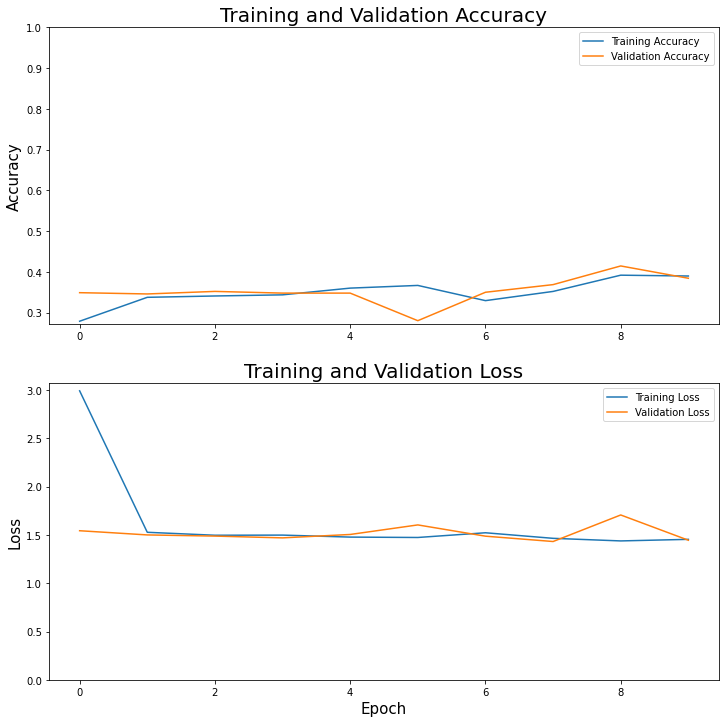

In [43]:
plot_train_results(train_results)

In [44]:
test_results(model_6, test_df)

20/20 - 2s - loss: 1.4528 - accuracy: 0.3733
Test loss: 1.45
Test accuracy: 37.33%


In [45]:
# Model 7
model_7 = model_cnn('relu', 'Adamax', SparseCategoricalCrossentropy(from_logits=False))
model_7.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_13 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_6 (Flatten)          (None, 1024)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 64)               

In [46]:
train_results = train_model(model_7, epochs = 10)

Epoch 1/10
62/62 [==============================] - 6s 90ms/step - loss: 5.7976 - accuracy: 0.2408 - val_loss: 2.3026 - val_accuracy: 0.1052
Epoch 2/10
62/62 [==============================] - 5s 81ms/step - loss: 2.3026 - accuracy: 0.1146 - val_loss: 2.3026 - val_accuracy: 0.1094
Epoch 3/10
62/62 [==============================] - 5s 79ms/step - loss: 2.3026 - accuracy: 0.1232 - val_loss: 2.3026 - val_accuracy: 0.1063
Epoch 4/10
62/62 [==============================] - 5s 81ms/step - loss: 2.3026 - accuracy: 0.1336 - val_loss: 2.3026 - val_accuracy: 0.1083
Epoch 5/10
62/62 [==============================] - 5s 79ms/step - loss: 2.3026 - accuracy: 0.1317 - val_loss: 2.3026 - val_accuracy: 0.1083
Epoch 6/10
62/62 [==============================] - 5s 77ms/step - loss: 2.3026 - accuracy: 0.1344 - val_loss: 2.3026 - val_accuracy: 0.1073
Epoch 7/10
62/62 [==============================] - 5s 76ms/step - loss: 2.3026 - accuracy: 0.1199 - val_loss: 2.3026 - val_accuracy: 0.1073
Epoch 8/10
62

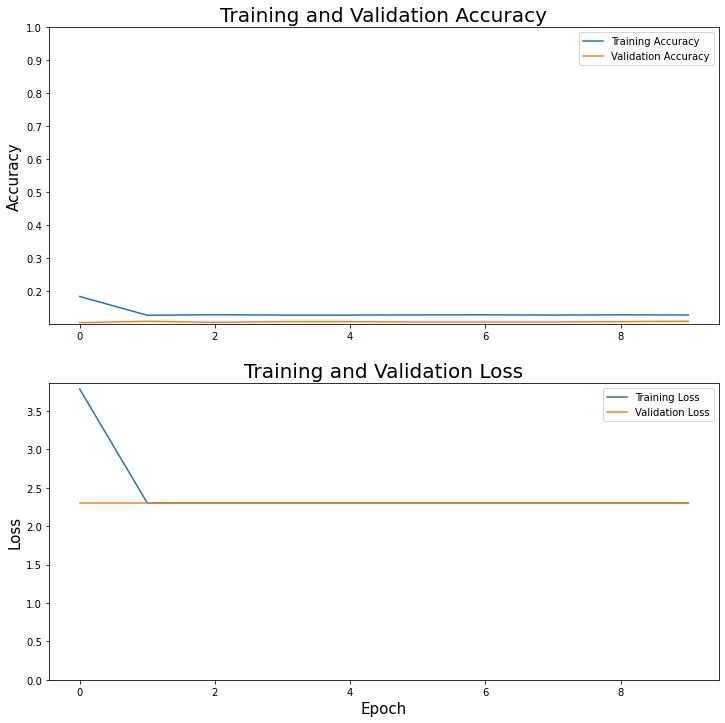

In [47]:
plot_train_results(train_results)

In [48]:
test_results(model_7,test_df)

20/20 - 1s - loss: 2.3026 - accuracy: 0.1271
Test loss: 2.30
Test accuracy: 12.71%


# Changing network architecture

In [49]:
#Removing a convolution layer in the model
model_8 = models.Sequential()
model_8.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_8.add(layers.MaxPooling2D((2, 2)))
#model.add(layers.Conv2D(64, (3, 3), activation='relu'))
#model.add(layers.MaxPooling2D((2, 2)))
model_8.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_8.add(layers.Flatten())
model_8.add(layers.Dense(64, activation='relu'))
model_8.add(layers.Dense(10))
model_8.compile(loss=SparseCategoricalCrossentropy(from_logits=False),
                optimizer='adam', metrics=['accuracy'])

In [50]:
model_8.summary()

Model: "sequential_7"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_21 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
flatten_7 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_14 (Dense)             (None, 64)                692288    
_________________________________________________________________
dense_15 (Dense)             (None, 10)                650       
Total params: 712,330
Trainable params: 712,330
Non-trainable params: 0
________________________________________________

In [51]:
train_results = train_model(model_8, epochs=10)

Epoch 1/10
62/62 [==============================] - 6s 86ms/step - loss: 6.6433 - accuracy: 0.2508 - val_loss: 6.1531 - val_accuracy: 0.1937
Epoch 2/10
62/62 [==============================] - 5s 84ms/step - loss: 6.4086 - accuracy: 0.1819 - val_loss: 6.1475 - val_accuracy: 0.1937
Epoch 3/10
62/62 [==============================] - 5s 84ms/step - loss: 6.3801 - accuracy: 0.1829 - val_loss: 6.1199 - val_accuracy: 0.1958
Epoch 4/10
62/62 [==============================] - 5s 84ms/step - loss: 4.5437 - accuracy: 0.2276 - val_loss: 2.3026 - val_accuracy: 0.0052
Epoch 5/10
62/62 [==============================] - 5s 83ms/step - loss: 2.3026 - accuracy: 0.0019 - val_loss: 2.3026 - val_accuracy: 0.0010
Epoch 6/10
62/62 [==============================] - 5s 84ms/step - loss: 2.3026 - accuracy: 0.0013 - val_loss: 2.3026 - val_accuracy: 0.0010
Epoch 7/10
62/62 [==============================] - 5s 82ms/step - loss: 2.3026 - accuracy: 0.0020 - val_loss: 2.3026 - val_accuracy: 0.0000e+00
Epoch 8/1

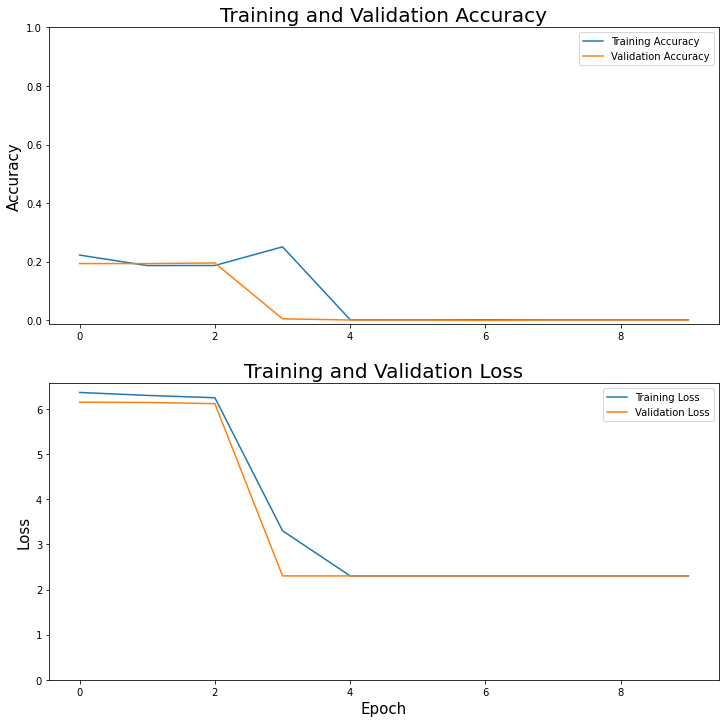

In [52]:
plot_train_results(train_results)

In [53]:
test_results(model_8,test_df)

20/20 - 1s - loss: 2.3026 - accuracy: 0.0032
Test loss: 2.30
Test accuracy: 0.32%


In [54]:
#Removing a convolution layer in the model

model_9 = models.Sequential()
model_9.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Conv2D(32, (3, 3), activation='relu'))
model_9.add(layers.Flatten())
model_9.add(layers.Dense(32, activation='relu'))
model_9.add(layers.Dense(10))
model_9.compile(loss=SparseCategoricalCrossentropy(from_logits=False),
                optimizer='adam', metrics=['accuracy'])
model_9.summary()

Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 13, 13, 32)        9248      
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 6, 6, 32)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 4, 4, 32)          9248      
_________________________________________________________________
flatten_8 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 32)               

In [55]:
train_results = train_model(model_9,epochs=10)

Epoch 1/10
62/62 [==============================] - 5s 79ms/step - loss: 2.1083 - accuracy: 0.3092 - val_loss: 1.4416 - val_accuracy: 0.4156
Epoch 2/10
62/62 [==============================] - 5s 77ms/step - loss: 1.5179 - accuracy: 0.3717 - val_loss: 1.4855 - val_accuracy: 0.3448
Epoch 3/10
62/62 [==============================] - 5s 81ms/step - loss: 1.4759 - accuracy: 0.3600 - val_loss: 1.5437 - val_accuracy: 0.4354
Epoch 4/10
62/62 [==============================] - 5s 82ms/step - loss: 1.4717 - accuracy: 0.3832 - val_loss: 1.3965 - val_accuracy: 0.4240
Epoch 5/10
62/62 [==============================] - 5s 84ms/step - loss: 1.3408 - accuracy: 0.4511 - val_loss: 2.7434 - val_accuracy: 0.3427
Epoch 6/10
62/62 [==============================] - 5s 82ms/step - loss: 1.8956 - accuracy: 0.3414 - val_loss: 1.6397 - val_accuracy: 0.3688
Epoch 7/10
62/62 [==============================] - 5s 82ms/step - loss: 1.4574 - accuracy: 0.4407 - val_loss: 1.3700 - val_accuracy: 0.4865
Epoch 8/10
62

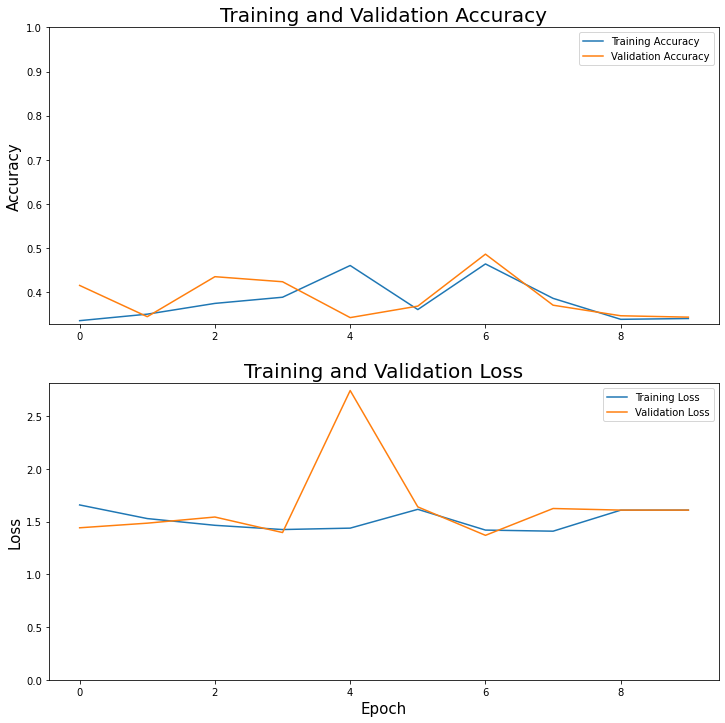

In [56]:
plot_train_results(train_results)

In [57]:
test_results(model_9,test_df)

20/20 - 1s - loss: 1.6094 - accuracy: 0.3341
Test loss: 1.61
Test accuracy: 33.41%


# Changing Network Initialization

In [58]:
initializer = tf.keras.initializers.RandomUniform() 

model_9 = models.Sequential()
model_9.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_9.add(layers.Dense(32, kernel_initializer=initializer)) 
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_9.add(layers.MaxPooling2D((2, 2)))
model_9.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_9.add(layers.Flatten())
model_9.add(layers.Dense(64, activation='relu'))
model_9.add(layers.Dense(10, activation='softmax'))
model_9.compile(loss=SparseCategoricalCrossentropy(from_logits=False),
                optimizer='adam', metrics=['accuracy'])
model_9.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_26 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dense_18 (Dense)             (None, 30, 30, 32)        1056      
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_27 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_18 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_28 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_9 (Flatten)          (None, 1024)             

In [59]:
train_results = train_model(model_9, epochs=10)

Epoch 1/10
62/62 [==============================] - 6s 90ms/step - loss: 1.7817 - accuracy: 0.2942 - val_loss: 1.5410 - val_accuracy: 0.3375
Epoch 2/10
62/62 [==============================] - 5s 88ms/step - loss: 1.5308 - accuracy: 0.3543 - val_loss: 1.4086 - val_accuracy: 0.3917
Epoch 3/10
62/62 [==============================] - 6s 90ms/step - loss: 1.4156 - accuracy: 0.3950 - val_loss: 1.3456 - val_accuracy: 0.4542
Epoch 4/10
62/62 [==============================] - 6s 91ms/step - loss: 1.2857 - accuracy: 0.4668 - val_loss: 1.1893 - val_accuracy: 0.5250
Epoch 5/10
62/62 [==============================] - 6s 94ms/step - loss: 1.1351 - accuracy: 0.5254 - val_loss: 1.0977 - val_accuracy: 0.5510
Epoch 6/10
62/62 [==============================] - 6s 93ms/step - loss: 1.0728 - accuracy: 0.5571 - val_loss: 0.9817 - val_accuracy: 0.6187
Epoch 7/10
62/62 [==============================] - 5s 88ms/step - loss: 0.9731 - accuracy: 0.5795 - val_loss: 0.9837 - val_accuracy: 0.6052
Epoch 8/10
62

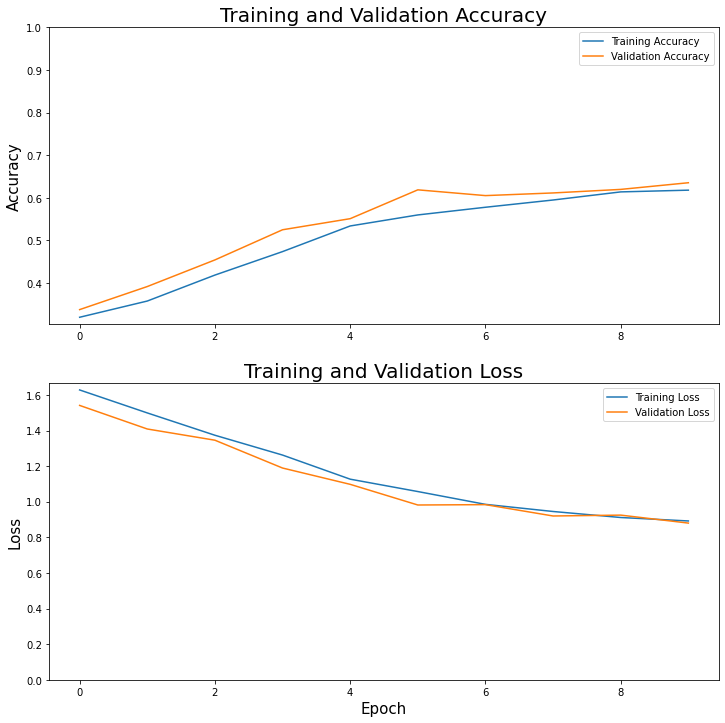

In [60]:
plot_train_results(train_results)

In [61]:
test_results(model_9,test_df)

20/20 - 2s - loss: 0.9627 - accuracy: 0.5915
Test loss: 0.96
Test accuracy: 59.15%


In [62]:
initializer = tf.keras.initializers.glorot_uniform()

model_10 = models.Sequential()
model_10.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_10.add(layers.Dense(32, kernel_initializer=initializer)) 
model_10.add(layers.MaxPooling2D((2, 2)))
model_10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_10.add(layers.MaxPooling2D((2, 2)))
model_10.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_10.add(layers.Flatten())
model_10.add(layers.Dense(64, activation='relu'))
model_10.add(layers.Dense(10, activation='softmax'))
model_10.compile(loss=SparseCategoricalCrossentropy(from_logits=False),
                 optimizer='adam', 
                 metrics=['accuracy'])
model_10.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_29 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dense_21 (Dense)             (None, 30, 30, 32)        1056      
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_30 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_31 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_10 (Flatten)         (None, 1024)            

In [63]:
train_results = train_model(model_10,epochs=10)

Epoch 1/10
62/62 [==============================] - 7s 99ms/step - loss: 1.7246 - accuracy: 0.2525 - val_loss: 1.4087 - val_accuracy: 0.4083
Epoch 2/10
62/62 [==============================] - 6s 89ms/step - loss: 1.3669 - accuracy: 0.4337 - val_loss: 1.1593 - val_accuracy: 0.5354
Epoch 3/10
62/62 [==============================] - 5s 88ms/step - loss: 1.1349 - accuracy: 0.5417 - val_loss: 1.0649 - val_accuracy: 0.5698
Epoch 4/10
62/62 [==============================] - 5s 88ms/step - loss: 1.0679 - accuracy: 0.5667 - val_loss: 0.9968 - val_accuracy: 0.5948
Epoch 5/10
62/62 [==============================] - 5s 88ms/step - loss: 0.9586 - accuracy: 0.6105 - val_loss: 0.9860 - val_accuracy: 0.6031
Epoch 6/10
62/62 [==============================] - 6s 91ms/step - loss: 0.9584 - accuracy: 0.6011 - val_loss: 0.9101 - val_accuracy: 0.6323
Epoch 7/10
62/62 [==============================] - 6s 91ms/step - loss: 0.8579 - accuracy: 0.6338 - val_loss: 0.9236 - val_accuracy: 0.6385
Epoch 8/10
62

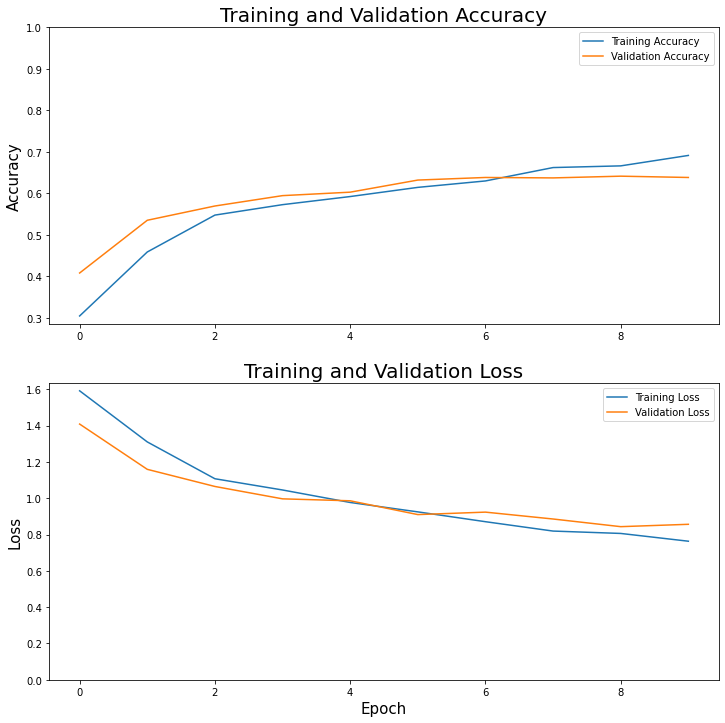

In [64]:
plot_train_results(train_results)

In [65]:
test_results(model_10,test_df)

20/20 - 2s - loss: 0.9254 - accuracy: 0.6235
Test loss: 0.93
Test accuracy: 62.35%


In [66]:
initializer = tf.keras.initializers.glorot_normal() 

model_11 = models.Sequential()
model_11.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model_11.add(layers.Dense(32, kernel_initializer=initializer)) 
model_11.add(layers.MaxPooling2D((2, 2)))
model_11.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_11.add(layers.MaxPooling2D((2, 2)))
model_11.add(layers.Conv2D(64, (3, 3), activation='relu'))
model_11.add(layers.Flatten())
model_11.add(layers.Dense(64, activation='relu'))
model_11.add(layers.Dense(10, activation='softmax'))
model_11.compile(loss=SparseCategoricalCrossentropy(from_logits=False),
                 optimizer='adam', 
                 metrics=['accuracy'])
model_11.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
dense_24 (Dense)             (None, 30, 30, 32)        1056      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_34 (Conv2D)           (None, 4, 4, 64)          36928     
_________________________________________________________________
flatten_11 (Flatten)         (None, 1024)            

In [67]:
train_results = train_model(model_11,epochs=10)

Epoch 1/10
62/62 [==============================] - 6s 95ms/step - loss: 1.7334 - accuracy: 0.2922 - val_loss: 1.5436 - val_accuracy: 0.3406
Epoch 2/10
62/62 [==============================] - 5s 85ms/step - loss: 1.4169 - accuracy: 0.4048 - val_loss: 1.2417 - val_accuracy: 0.4906
Epoch 3/10
62/62 [==============================] - 5s 85ms/step - loss: 1.1794 - accuracy: 0.5382 - val_loss: 1.1026 - val_accuracy: 0.5740
Epoch 4/10
62/62 [==============================] - 5s 85ms/step - loss: 1.0718 - accuracy: 0.5650 - val_loss: 1.0383 - val_accuracy: 0.5750
Epoch 5/10
62/62 [==============================] - 5s 83ms/step - loss: 0.9770 - accuracy: 0.6016 - val_loss: 0.9818 - val_accuracy: 0.5885
Epoch 6/10
62/62 [==============================] - 5s 82ms/step - loss: 0.8958 - accuracy: 0.6272 - val_loss: 0.9418 - val_accuracy: 0.6104
Epoch 7/10
62/62 [==============================] - 5s 83ms/step - loss: 0.8910 - accuracy: 0.6301 - val_loss: 0.8858 - val_accuracy: 0.6406
Epoch 8/10
62

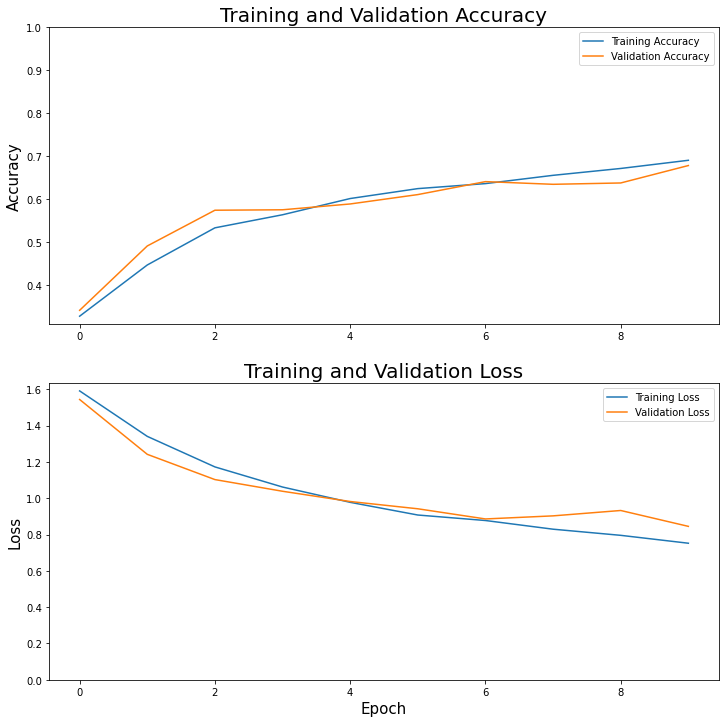

In [68]:
plot_train_results(train_results)

In [69]:
test_results(model_11,test_df)

20/20 - 2s - loss: 0.9435 - accuracy: 0.6363
Test loss: 0.94
Test accuracy: 63.63%


## Conclusion

        1. The model is trained with epochs of 15 initially but repeated training of the model in the running kernel makes the model overfit the data and could result in fake accuracies.
        2. With hyperparameter tuning, the model is improved by initialising with Xavier Glorot Initialization namely Xavier Uniform and Xavier Gaussian.
        3. It has been observed that the model performed with other loss functions and optimisers but could yield better results with appropriate batch size
        4. Meanwhile, it is also concluded that using different layers and adding more layers in the model would only increase the comkplexity but not improve the accuray unless an appropriate activation function is given.
        3. Later, the model is tuned with various epochs and batch_size to improve accuracy.
        4. Finally, the CNN gave the maximum accuracy of 68% with initial relu activation function and adam optimiser and no initialization and SparseCategoricalCrossEntropy as the best loss function.

# Author
    Mahesh Kumar Badam Venkata
    Master of Science in Applied Data Science
    Syracuse University, Syracuse, NY

# Citation

**References:**<br>

1. ADL (24 April 2018), "*An intuitive guide to Convolutional Neural Networks*" retrieved from https://www.freecodecamp.org/news/an-intuitive-guide-to-convolutional-neural-networks-260c2de0a050/

2. TensorFlow Tutorials,"*Convolutional Neural Network (CNN)*" retrieved from https://www.tensorflow.org/tutorials/images/cnn

3. Analytics Vidhya Courses, "*Convolutional Neural Networks (CNN) from Scratch*" retrieved from https://courses.analyticsvidhya.com/courses/take/convolutional-neural-networks-cnn-from-scratch/texts/10844923-what-is-a-neural-network

4. TensorFlow Core Documentation, "*Module: tf.keras.initializers*" retrieved from  https://www.tensorflow.org/api_docs/python/tf/keras/initializers?version=nightly

# Licensing

MIT License

<p style='text-align:justify'> 
Copyright (c) 2020 Mahesh Kumar Badam Venkata

Permission is hereby granted, free of charge, to any person obtaining a copy
of this software and associated documentation files (the "Software"), to deal
in the Software without restriction, including without limitation the rights
to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
copies of the Software, and to permit persons to whom the Software is
furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all
copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE
SOFTWARE.
</p>